# <center><div class="alert alert-info">Mall Customer Segmentation</div>
<center> By - Jitendra Girish Patil

## Problem Statement

A Good Sales is always about understanding the target audience which can be grouped under some ways like Shopping pattern, spending pattern, shopping score, salary etc.

The store owner can strategize its offerings in such a way  that it targets only right customers of a group for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer  recommendation) and the customer (discounts, offers, reward points, gifts, etc.).

To solve this issue we have to create some clusters based on customers characteristics.


### <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [1]:
import numpy as np                       # for numerical operation
import pandas as pd                      # for dataset handling
import matplotlib.pyplot as plt          # for data visualization
import seaborn as sns                    # for advanced data Visualiszation
from sklearn.preprocessing import MinMaxScaler, LabelEncoder       # for preprocessing the data
import warnings                          # For Warnings
warnings.filterwarnings('ignore')

### <center><div class="alert alert-info">DATA EXPLORATION</div>

### Importing Dataset

In [55]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')      # reading the data set
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Checking Shape and Structure

In [41]:
# checking shape
df.shape

(200, 5)

In [42]:
# checking size
df.size

1000

In [43]:
# chekcing dtypes
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Checking information and description

In [44]:
# checking description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
# checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### <center><div class="alert alert-info">DATA PREPROCESSING</div>

### Checking Null Values

In [46]:
(df.isnull().sum()*100)/df.shape[0]

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

- No Null Values are present in the data set

### Converting from non numeric to numeric dtypes

In [47]:
label_encoder = LabelEncoder()
col1 = ['Gender']
# converting non numeric into categorical
df['Gender'] = label_encoder.fit_transform(df['Gender'])        # converting categorical into numeric

In [48]:
# checking if all the non numeric type are converted into numeric type
df.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [49]:
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]

### <center><div class="alert alert-info">DATA VISUALISATION</div>

Text(0.5, 1.0, 'Gender')

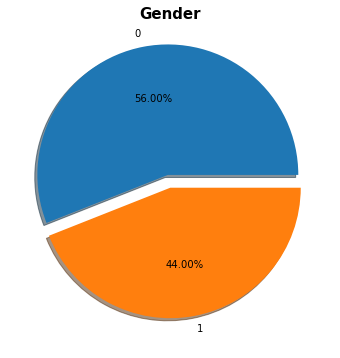

In [50]:
plt.figure(figsize=(10,6))
explode = [0.1,0]
perc = df['Gender'].value_counts()
lab = list(df['Gender'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode=explode, shadow=True)
plt.title('Gender', size=15, fontweight='bold')

### <div class="alert alert-success">Interpretation</div> 
    - Most of the the percentage 56% is of Female and 44% is of Male.

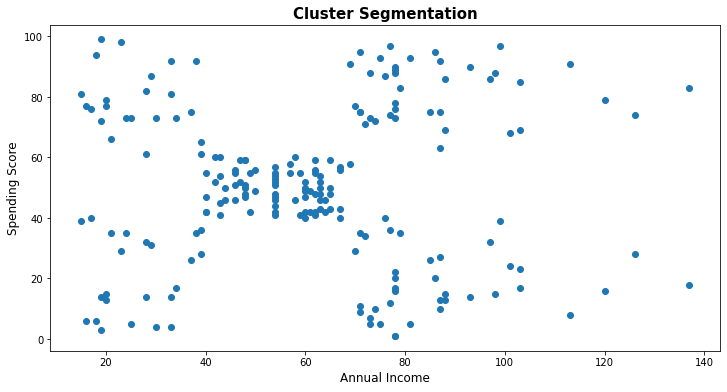

In [56]:
plt.title('Cluster Segmentation',size=15, fontweight='bold')
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.xlabel('Annual Income', size=12)
plt.ylabel('Spending Score', size=12)
plt.show()

### <div class="alert alert-success">Interpretation</div>
    - Here we can see the cluster formation, but right now we cant distinguish between the type of clusters they are.

<AxesSubplot:title={'center':'Gender wise Annual income'}, xlabel='Gender', ylabel='Annual Income (k$)'>

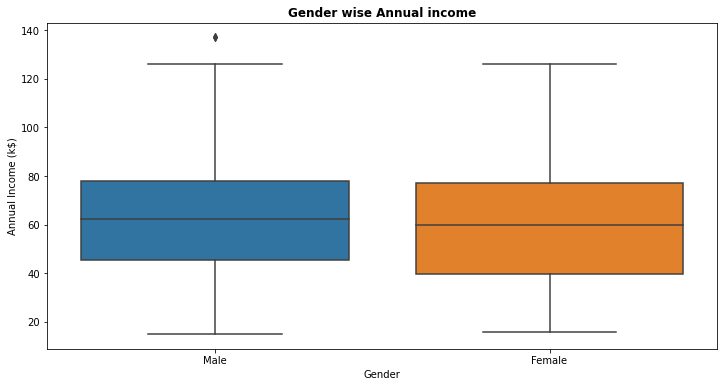

In [57]:
plt.title("Gender wise Annual income",fontweight='bold',fontsize=12)
sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'])

### <div class="alert alert-success">Interpretation</div>
    - Here we can see that the annual income of Female is from 40-78K and for Male have from 45K to 80K.
    - We can see a single outlier in Male.

<AxesSubplot:title={'center':'Gender wise Spending Score'}, xlabel='Gender', ylabel='Spending Score (1-100)'>

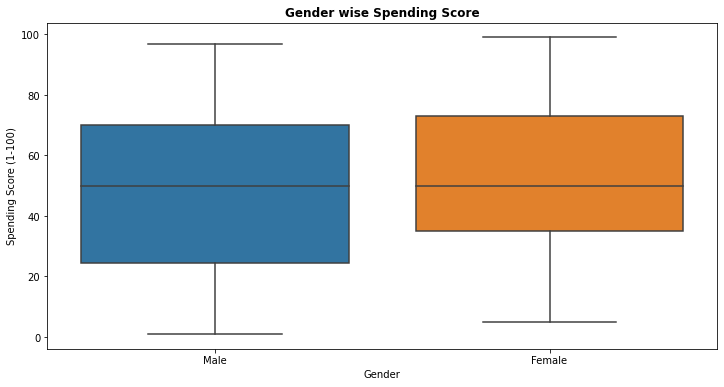

In [63]:
plt.title("Gender wise Spending Score",fontweight='bold',fontsize=12)
sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'])

### <div class="alert alert-success">Interpretation</div> 
    - Here we can see that the Spending Score of Female is from 38-75 and for Male have from 44 to 70.

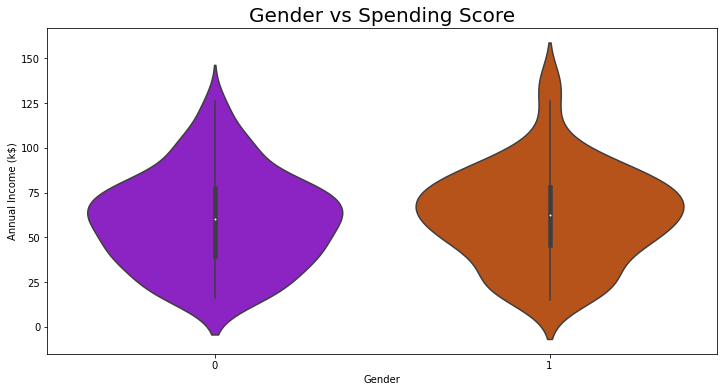

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'gnuplot')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

### <div class="alert alert-success">Interpretation</div>
    - We can see that there are more males who get paid more than females. 
    - But, The number of males and females is equal in number when it comes to low annual income.

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

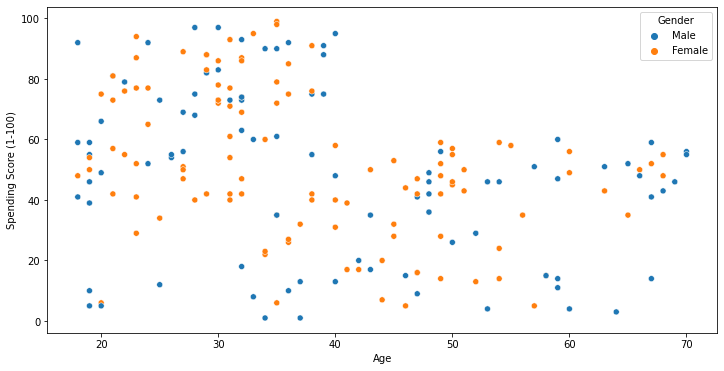

In [60]:
sns.scatterplot(data=df, x='Age',y='Spending Score (1-100)',hue='Gender')

### <div class="alert alert-success">Interpretation</div>
    - From the distributtion of points we can see that after age 40 the spending score decreases.

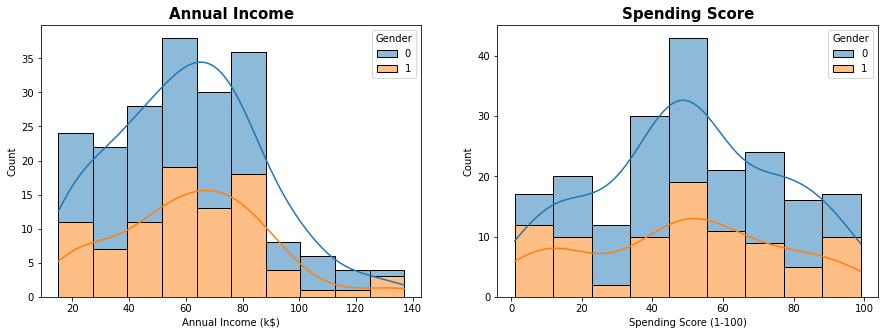

In [14]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', kde=True,multiple="stack")
plt.title('Annual Income',size=15, fontweight='bold')

plt.subplot(122)
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender',kde=True,multiple="stack")
plt.title('Spending Score',size=15, fontweight='bold')
plt.show()

### <div class="alert alert-success">Interpretation</div>
     - Most of the income is of Male Gender between range 50-90K and for Female most of the have income from 20-90K.
     - For Male the spending score is most in the range 30-55 and for Female, it is from 35-55.

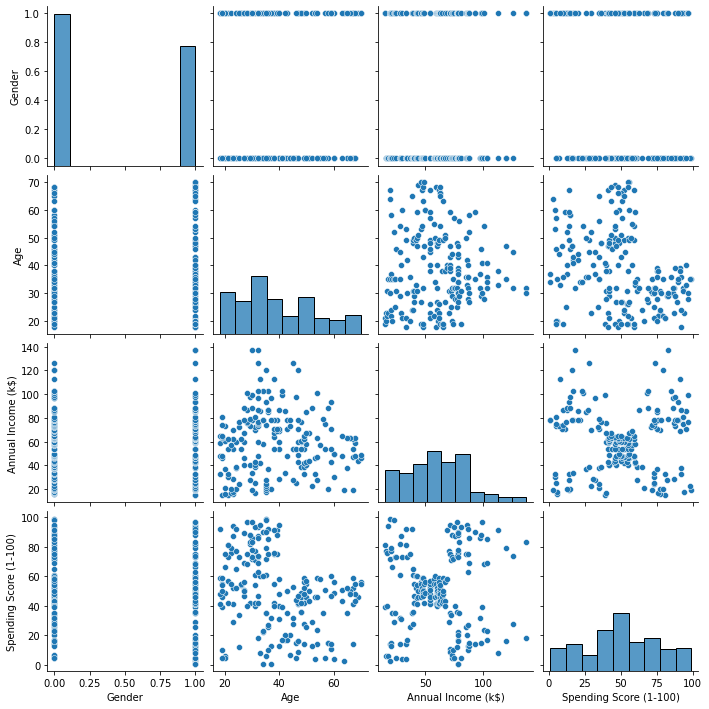

In [15]:
sns.pairplot(df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

### <div class="alert alert-success">Interpretation</div> 

    - Most of the customers are in the 20-40 age group.
    - Spending score is high for the customers in the age group of 20-40.
    - Spending score is high for customers with very low and very high income.

### <center><div class="alert alert-info">MODEL BUILDING AND TRAINING</div>

## KMeans

In [16]:
# importing library
from sklearn.cluster import KMeans

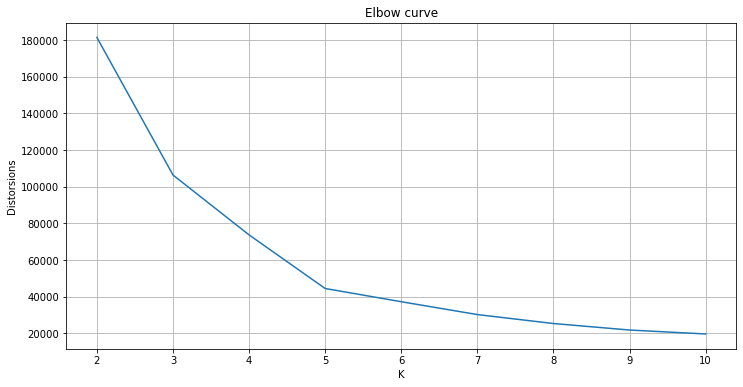

In [17]:
# finding the least error using ELBOW METHOD
distortion = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)          
    kmeans.fit_predict(df1)              # fitting the data set and prediciting the values
    distortion.append(kmeans.inertia_)      # .inertia for error caluclation
plt.figure(figsize=(12,6))
plt.plot(range(2,11), distortion)
plt.title('Elbow curve')
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.grid(True)

In [18]:
# SILHOUETTE SCORE

# importing library
from sklearn.metrics import silhouette_score

for i in range(2,11):
    cluster = KMeans(n_clusters=i)
    cluster_labels = cluster.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)           # geting silhouette score
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.53976103063432
For n_clusters = 7 The average silhouette_score is : 0.5288104473798049
For n_clusters = 8 The average silhouette_score is : 0.459295844567539
For n_clusters = 9 The average silhouette_score is : 0.4605043439759829
For n_clusters = 10 The average silhouette_score is : 0.4499261454462227


In [19]:
# making model
kmeans_model = KMeans(n_clusters=5)
y_km = kmeans_model.fit_predict(df1)       # fitting and predicting the dataset
y_km

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [20]:
df_copy = df1
df_copy['KMeans'] = y_km         # appending the predicted values in KMeans column
df_copy.head(2)

,Annual Income (k$),Spending Score (1-100),KMeans
0,15,39,2
1,15,81,4


## Hierarchichal Clustering 

In [21]:
# importing libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

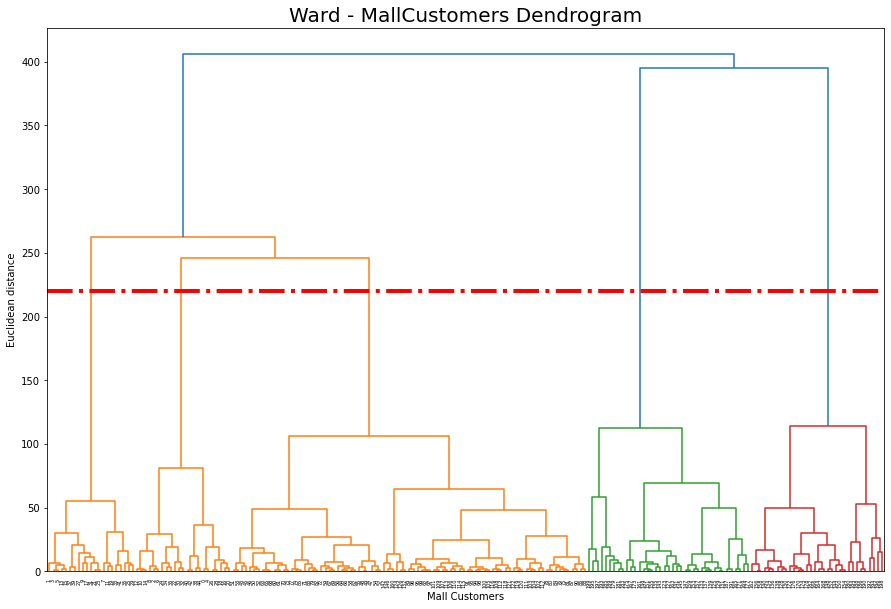

In [22]:
# Making dendrogram
plt.figure(figsize=(15,10))
dend = sch.dendrogram(sch.linkage(df1, method='ward'))        # for Dendrogram using ward linkage method
plt.axhline(y=220, color='red', linestyle='-.', lw=4)
plt.title('Ward - MallCustomers Dendrogram',fontsize=20)
plt.xlabel('Mall Customers',fontsize=10)
plt.ylabel('Euclidean distance', fontsize=10)
plt.show()

In [23]:
hc_model = AgglomerativeClustering(n_clusters=5)          # Making model
y_hc = hc_model.fit_predict(df1)                       # fitting and predicting the dataset
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [24]:
df_copy['Hierarchichal'] = y_hc             # appending the predicted values in Hierarchichal column
df_copy.head(2)

,Annual Income (k$),Spending Score (1-100),KMeans,Hierarchichal
0,15,39,2,4
1,15,81,4,3


### <center><div class="alert alert-info">COMPARISION</div>

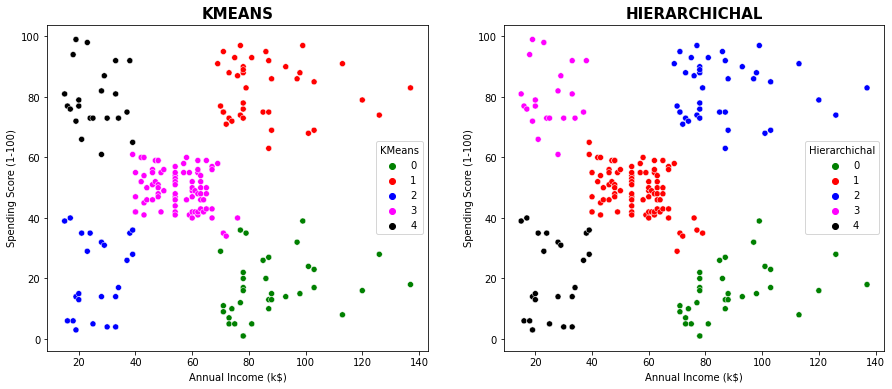

In [25]:
plt.subplots(figsize=(15,6))

color=['green','red','blue','magenta','black']

plt.subplot(121)
sns.scatterplot(df_copy['Annual Income (k$)'],df_copy['Spending Score (1-100)'],hue=df_copy['KMeans'],palette=color)
plt.title('KMEANS',size=15,fontweight='bold')

plt.subplot(122)
sns.scatterplot(df_copy['Annual Income (k$)'],df_copy['Spending Score (1-100)'],hue=df_copy['Hierarchichal'],palette=color)
plt.title('HIERARCHICHAL',size=15,fontweight='bold')
plt.show()

In [26]:
compare = pd.DataFrame({'Performance':[round(silhouette_score(df_copy, df_copy['KMeans']),3),
                                       round(silhouette_score(df_copy, df_copy['Hierarchichal']),3)]},
                    index=['KMeans','Hierarchichal'])
compare

,Performance
KMeans,0.555
Hierarchichal,0.554


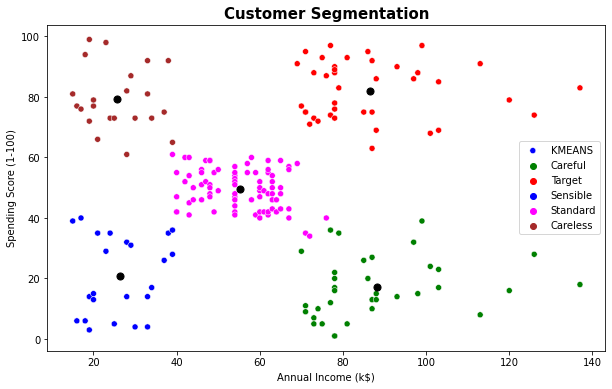

In [38]:
plt.figure(figsize=(10,6))
label = ['KMEANS','Careful','Target','Sensible','Standard','Careless']
color=['green','red','blue','magenta','brown']
sns.scatterplot(df_copy['Annual Income (k$)'],df_copy['Spending Score (1-100)'],hue=df_copy['KMeans'],palette=color)
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:, 1], s = 50, c = 'black',label = 'centeroid')
plt.title('Customer Segmentation',size=15,fontweight='bold')
plt.legend(labels=label)
plt.show()

In [28]:
new_df = pd.concat([df_copy,df['CustomerID']],axis=1)
new_df

,Annual Income (k$),Spending Score (1-100),KMeans,Hierarchichal,CustomerID
0,15,39,2,4,1
1,15,81,4,3,2
2,16,6,2,4,3
3,16,77,4,3,4
4,17,40,2,4,5
...,...,...,...,...,...
195,120,79,1,2,196
196,126,28,0,0,197
197,126,74,1,2,198
198,137,18,0,0,199


In [29]:
cust1=new_df[new_df["KMeans"]==1]
print('Number of Customers in 1st group =', len(cust1))
print('Their IDs -', cust1["CustomerID"].values)
print("----------------------------------------------------------------------------")
print()
cust2=new_df[new_df["KMeans"]==2]
print('Number of Customers in 2nd group =', len(cust2))
print('Their IDs -', cust2["CustomerID"].values)
print("----------------------------------------------------------------------------")
print()
cust3=new_df[new_df["KMeans"]==0]
print('Number of Customers in 3rd group =', len(cust3))
print('Their IDs -', cust3["CustomerID"].values)
print("----------------------------------------------------------------------------")
print()
cust4=new_df[new_df["KMeans"]==3]
print('Number of Customers in 4th group =', len(cust4))
print('Their IDs -', cust4["CustomerID"].values)
print("----------------------------------------------------------------------------")
print()
cust5=new_df[new_df["KMeans"]==4]
print('Number of Customers in 5th group =', len(cust5))
print('Their IDs -', cust5["CustomerID"].values)
print("----------------------------------------------------------------------------")
print()

Number of Customers in 1st group = 39
Their IDs - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
----------------------------------------------------------------------------

Number of Customers in 2nd group = 23
Their IDs - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
----------------------------------------------------------------------------

Number of Customers in 3rd group = 35
Their IDs - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
----------------------------------------------------------------------------

Number of Customers in 4th group = 81
Their IDs - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  

### <center><div class="alert alert-info">CONCLUSION</div>
* If we look at the graphs of different models we can see that KMeans graph have better cluster formation than hierarchical clustering with performance from silhouette coefficient is 0.445. 
* Hierarchichal graph also shows almost similar traits like KMeans but there the clusters are overlapping with each other which means they have some similarities in it but there is not much difference in performance from silhouette coefficient which is 0.442 for both with and without PCA model

### *As the Cluster formation of KMeans is better than Hierarchical Clustering and also there isnt a big difference in silhouette coefficient also, We can consider KMeans Clustering for this problem statement*

### <center><div class="alert alert-info">BUSINESS IMPLICATIONS</div>
    - We can that the Target, Standard and Careless cluster people are the target audience for Mall as they have high        Spending Score.
    - Even though the Careless Cluster people have less Annual Income they have high Spending Score. But one thing the Shop owners in mall have to remember that the Careless Cluster people can be a liability for the business as they may use credit card but don't pay out the amount because of less income. So selling items to these people should be done           cautiously.
    - Standard Cluster people fall in standard cluster which means they can buy some item but they are sensible in buying    and buy only those items that they need.
    - Sensible and Careless Cluster people shouldn't be considered for sales as they don't have much Spending score even      though they have good income.
### So, Focusing on Target, Standard and Carefull Cluster people having Gender Female would benefit the Sales. Gender Male will also benefit the sales but comparatively less.
